In [3]:
%load_ext autoreload
%autoreload 2

import dissociation as ds
import jax.numpy as np
import jax
import matplotlib.pyplot as plt

In [4]:
in_dim = 5
hidden_dim = 7
out_dim = 3
p = 6

w1, w2 = ds.sample_weights(in_dim, hidden_dim, out_dim, 0.2, 0.7)
xs, ys = ds.random_regression_task(in_dim, out_dim, p)

sig_xx = 1. / p * xs @ xs.T
sig_yx = 1. / p * ys @ xs.T
sig_yy = 1. / p * ys @ ys.T

u, s, v = ds.compact_svd(sig_yx @ np.linalg.pinv(sig_xx))
r = jax.random.orthogonal(jax.random.key(1), hidden_dim)[:, :s.shape[0]]
w1 = r @ np.sqrt(s) @ v.T
w2 = u @ np.sqrt(s) @ r.T

sigma = .2

print(ds.input_noise_sensitivity(w1, w2, xs, ys, sigma))
print(ds.input_noise_sensitivity_theory(w1, w2, xs, ys, sigma))

0.4417198
0.4416325


In [23]:
in_dim = 2
hidden_dim = 7
out_dim = 3
p = 1

xs, ys = ds.random_regression_task(in_dim, out_dim, p)

sig_xx = 1. / p * xs @ xs.T
sig_yx = 1. / p * ys @ xs.T
sig_yy = 1. / p * ys @ ys.T

u, s, v = ds.compact_svd(sig_yx @ np.linalg.pinv(sig_xx))
r = jax.random.orthogonal(jax.random.key(1), hidden_dim)[:, :s.shape[0]]
w1 = r @ np.sqrt(s) @ v.T

u, s, v = ds.compact_svd(w1)

In [24]:
np.round(v @ v.T, 3)

Array([[ 0.818     , -0.386     ],
       [-0.386     ,  0.18200001]], dtype=float32)

In [3]:
in_dim = 5
hidden_dim = 7
out_dim = 3
p = 6

w1, w2 = ds.sample_weights(in_dim, hidden_dim, out_dim, 0.2, 0.7)
xs, ys = ds.random_regression_task(in_dim, out_dim, p)

sig_xx = 1. / p * xs @ xs.T
sig_yx = 1. / p * ys @ xs.T
sig_yy = 1. / p * ys @ ys.T

u, s, v = ds.compact_svd(sig_yx @ np.linalg.pinv(sig_xx))
r = jax.random.orthogonal(jax.random.key(1), hidden_dim)[:, :s.shape[0]]
w1 = r @ np.sqrt(s) @ v.T
w2 = u @ np.sqrt(s) @ r.T

sigma_1 = .7
sigma_2 = .2

print(ds.parameter_noise_sensitivity(w1, w2, xs, ys, sigma_1, sigma_2))
print(ds.parameter_noise_sensitivity_theory(w1, w2, xs, ys, sigma_1, sigma_2))

6.161451
6.1554775


In [57]:
in_dim = 8
hidden_dim = 22
out_dim = 5
p = 15

w1, w2 = ds.sample_weights(in_dim, hidden_dim, out_dim, 0.2, 0.2)
xs, ys = ds.random_regression_task(in_dim, out_dim, p)

sig_xx = 1. / p * xs @ xs.T
sig_yx = 1. / p * ys @ xs.T
sig_yy = 1. / p * ys @ ys.T

u, s, v = ds.compact_svd(sig_yx @ np.linalg.pinv(sig_xx))
r = jax.random.orthogonal(jax.random.key(1), hidden_dim)[:, :s.shape[0]]
w1 = r @ np.sqrt(s) @ v.T
w2 = u @ np.sqrt(s) @ r.T

"""
q = jax.random.normal(jax.random.key(1), r.shape)
qinv = np.linalg.pinv(q)
w1 = q @ np.sqrt(s) @ v.T
w2 = u @ np.sqrt(s) @ qinv
"""

#sigma_1 = .25
#sigma_2 = np.sqrt((in_dim / out_dim) * sigma_1**2)

sigma = 0.3
sigma_1 = sigma * 1 / np.sqrt(np.trace(sig_xx))
sigma_2 = sigma * 1 / np.sqrt(out_dim)

print(ds.parameter_noise_sensitivity(w1, w2, xs, ys, sigma_1, sigma_2))
print(ds.parameter_noise_sensitivity_theory(w1, w2, xs, ys, sigma_1, sigma_2))

1.8989406
1.8986694


In [35]:
np.trace(w1.T@w1@sig_xx)

Array(3.703013, dtype=float32)

In [36]:
1/p * np.linalg.norm(w1@xs, ord="fro")**2

Array(3.7030122, dtype=float32)

In [34]:
1/p * np.linalg.norm(xs, ord="fro")**2

Array(8.300738, dtype=float32)

In [30]:
sens = []
vals = np.linspace(0.1, 2.1, 1000)
for scale in vals:
    w1_ = w1 * scale
    w2_ = w2 * 1. / scale
    sens.append(ds.parameter_noise_sensitivity_theory(w1_, w2_, xs, ys, sigma_1, sigma_2))
sens = np.asarray(sens)

1.7196195
0.3125


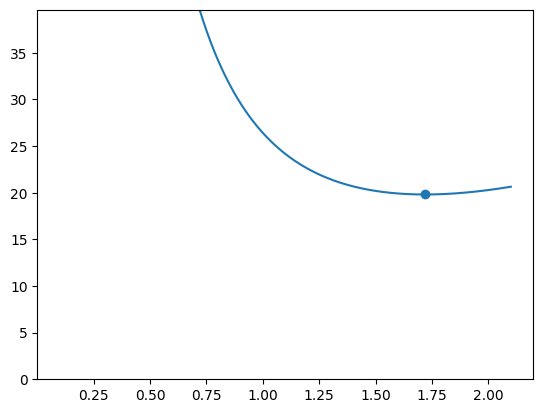

In [31]:
fig, ax = plt.subplots()
ax.plot(vals, sens)
ax.scatter(vals[np.argmin(sens)], np.min(sens))
ax.set_ylim(0., np.min(sens) * 2.)
print(vals[np.argmin(sens)])
print(0.5 * out_dim / in_dim)

In [81]:
((in_dim * sigma_1**2) / (out_dim * sigma_2**2))**(1 / 4)

1.189207115002721

In [51]:
p = 5
xs = jax.random.normal(jax.random.key(1), (4, p))
xx = 1. / p * xs @ xs.T
xx_ = np.linalg.pinv(xx)

np.round(xs.T @ xx_ @ xx @ xx_.T @ xs, 3)

Array([[ 4.7790003 ,  0.23      ,  0.739     ,  0.22000001,  0.637     ],
       [ 0.23      ,  4.761     , -0.77000004, -0.22900002, -0.66400003],
       [ 0.739     , -0.77000004,  2.522     , -0.73700005, -2.137     ],
       [ 0.22000001, -0.22900002, -0.73700005,  4.781     , -0.63600004],
       [ 0.637     , -0.66400003, -2.137     , -0.63600004,  3.1580002 ]],      dtype=float32)

Necessary condition for minimising sensitivity to paramter noise (from Lagrangian multipliers)
$$aW_2^TW_2 = bHH^T$$, i.e., Hidden layre representation has to have same left SV as right of W2
Test numerically for general, least squares, and minimum-norm solution

In [79]:
in_dim = 5
hidden_dim = 7
out_dim = 3
p = 4

xs, ys = ds.random_regression_task(in_dim, out_dim, p)
# xs = np.identity(5)

sig_xx = 1. / p * xs @ xs.T
sig_yx = 1. / p * ys @ xs.T

u, s, v = ds.compact_svd(sig_yx @ np.linalg.pinv(sig_xx))
r = jax.random.orthogonal(jax.random.key(1), hidden_dim)[:, :s.shape[0]]
w1 = r @ np.sqrt(s) @ v.T
w2 = u @ np.sqrt(s) @ r.T

r1, s1, _ = ds.compact_svd(w2.T @ w2)
_, s2, r2 = ds.compact_svd(w1 @ xs @ xs.T @ w1.T)

In [80]:
np.round(r1.T @ r2, 3)

Array([[ 0.943     ,  0.29200003,  0.15900001],
       [-0.323     ,  0.919     ,  0.22700001],
       [-0.08000001, -0.26500002,  0.961     ]], dtype=float32)

In [81]:
np.round(r2.T @ r1, 3)

Array([[ 0.943     , -0.323     , -0.08000001],
       [ 0.29200003,  0.919     , -0.26500002],
       [ 0.15900001,  0.22700001,  0.961     ]], dtype=float32)

In [82]:
s1

Array([[2.5562305 , 0.        , 0.        ],
       [0.        , 0.4164447 , 0.        ],
       [0.        , 0.        , 0.05011942]], dtype=float32)

In [83]:
s2

Array([[3.3773756 , 0.        , 0.        ],
       [0.        , 1.1807268 , 0.        ],
       [0.        , 0.        , 0.14841264]], dtype=float32)

In [37]:
in_dim = 5
hidden_dim = 7
out_dim = 3
p = 4

xs, ys = ds.random_regression_task(in_dim, out_dim, p)
w1, w2 = ds.sample_weights(in_dim, hidden_dim, out_dim, 0.2, 0.2)

sig_xx = 1. / p * xs @ xs.T
sig_yx = 1. / p * ys @ xs.T

eta = 0.01
loss = []
for i in range(15000):
    dw1 = out_dim * sigma_2**2 * w1 @ sig_xx
    dw2 = sigma_1**2 * np.linalg.trace(sig_xx) * w2
    
    w1 -= eta/5 * dw1
    w2 -= eta/5 * dw2

    dw1 = w2.T @ (w2 @ w1 @ xs - ys) @ xs.T
    dw2 = (w2 @ w1 @ xs - ys) @ xs.T @ w1.T
    w1 -= eta * dw1
    w2 -= eta * dw2

    loss.append(0.5 / p * np.linalg.norm(w2 @ w1 @ xs - ys)**2)

    

In [38]:
np.round(w2 @ w1 @ xs  @ xs.T - ys  @ xs.T, 3)

Array([[-0.002,  0.002,  0.007,  0.003, -0.006],
       [-0.006,  0.005, -0.004, -0.006,  0.001],
       [-0.001, -0.002,  0.002,  0.006, -0.001]], dtype=float32)

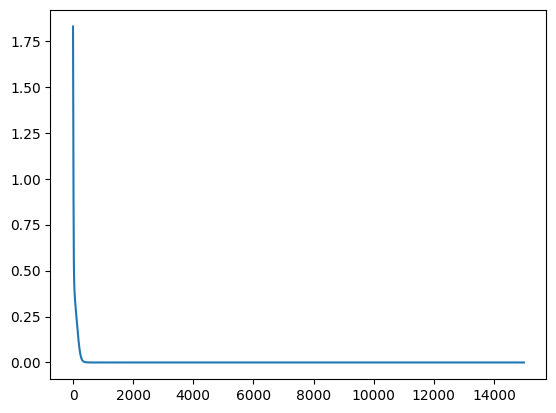

In [39]:
fig, ax = plt.subplots()
ax.plot(loss)

In [40]:
r1, s1, _ = ds.compact_svd(w2.T @ w2)
_, s2, r2 = ds.compact_svd(w1 @ xs @ xs.T @ w1.T)

In [46]:
np.round(s1, 2)

Array([[2.4199998, 0.       , 0.       ],
       [0.       , 1.0699999, 0.       ],
       [0.       , 0.       , 0.76     ]], dtype=float32)

In [48]:
np.round(s2, 2)

Array([[4.97     , 0.       , 0.       , 0.       ],
       [0.       , 2.4199998, 0.       , 0.       ],
       [0.       , 0.       , 1.04     , 0.       ],
       [0.       , 0.       , 0.       , 0.       ]], dtype=float32)

In [50]:
((0.2**2 *4*20) / (0.2**2 *8*20))

0.5

In [60]:
(1 * (1 / 1.19)) / (1 * 1.19)

0.706164818868724

In [61]:
np.sqrt(0.5)

Array(0.70710677, dtype=float32, weak_type=True)

In [62]:
a = jax.random.normal(jax.random.key(1), (12, 4))
np.linalg.norm(a, ord="fro")**2

Array(50.619896, dtype=float32)

In [63]:
np.linalg.norm(1.2*a, ord="fro")**2

Array(72.89268, dtype=float32)

In [64]:
1.2**2 * np.linalg.norm(a, ord="fro")**2

Array(72.892654, dtype=float32)

In [54]:
sig_xx = 1. / p * xs @ xs.T
sig_yx = 1. / p * ys @ xs.T
sig_yy = 1. / p * ys @ ys.T

c = np.trace(sig_yy) - np.trace(sig_yx @ np.linalg.pinv(sig_xx) @ sig_yx.T)
c

Array(-4.7683716e-07, dtype=float32)

In [12]:
(12*20) / (8*20)

1.5

In [57]:
np.trace(np.identity(5))

Array(5., dtype=float32)

In [ ]:
sens = []
vals = np.linspace(0.01, 2.6, 1000)
for scale in vals:
    s1 = sigma_1 * scale
    s2 = sigma_2 * 1. / scale
    sens.append(ds.parameter_noise_sensitivity_theory(w1, w2, xs, ys, s1, s2))
sens = np.asarray(sens)

In [36]:
np.linalg.trace(sig_xx)

Array(2.256615, dtype=float32)

In [10]:
1e-6

1e-06

In [30]:
c

Array(0., dtype=float32)

In [60]:
samples_n = 1000
xis = jax.random.normal(jax.random.key(1), (in_dim, p, samples_n)) * sigma

losses = []
for i in range(samples_n):
    loss = 0.
    for j, (x, y) in enumerate(zip(xs.T, ys.T)):
        loss += np.linalg.norm(w2 @ w1 @ (x + xis[:, j, i]) - y, ord=2)**2
    losses.append(loss / (2 * p))
print(np.mean(np.asarray(losses)))


95.7295


In [56]:
96.84128 / p

16.14021333333333

In [57]:
losses

[Array(33.079445, dtype=float32),
 Array(200.45409, dtype=float32),
 Array(44.081936, dtype=float32),
 Array(35.711414, dtype=float32),
 Array(149.54005, dtype=float32),
 Array(82.14019, dtype=float32),
 Array(37.751564, dtype=float32),
 Array(66.179115, dtype=float32),
 Array(86.63437, dtype=float32),
 Array(98.28079, dtype=float32),
 Array(75.338234, dtype=float32),
 Array(72.506355, dtype=float32),
 Array(57.71897, dtype=float32),
 Array(202.37936, dtype=float32),
 Array(109.39957, dtype=float32),
 Array(83.75436, dtype=float32),
 Array(59.43121, dtype=float32),
 Array(61.420513, dtype=float32),
 Array(99.470535, dtype=float32),
 Array(59.299522, dtype=float32),
 Array(106.20898, dtype=float32),
 Array(179.85477, dtype=float32),
 Array(90.898, dtype=float32),
 Array(104.315094, dtype=float32),
 Array(60.612236, dtype=float32),
 Array(77.852394, dtype=float32),
 Array(48.237854, dtype=float32),
 Array(143.16397, dtype=float32),
 Array(134.27657, dtype=float32),
 Array(89.97247, dtype

In [30]:
0.5 / p

0.07142857142857142

In [26]:
loss = 0.
for x, y in zip(xs.T, ys.T):
    loss += np.linalg.norm(w2 @ w1 @ x - y, ord=2)**2
print(0.5 / p * loss)
print(0.5 / p * np.linalg.norm(w2 @ w1 @ xs - ys)**2)



0.4381415
0.43814158


In [5]:
import jax

def t(w1, w2, xs, ys):
    @jax.vmap(in_axes=-1)
    def tt(x, y):
        return w2 @ w1 @ x - y

    return tt(xs, ys)

t(w1, w2, xs, ys)

TypeError: vmap() missing 1 required positional argument: 'fun'

In [ ]:
np.linalg.svd(

In [9]:
1e5

100000.0

In [44]:
for i in range(1000):
    xi = 

Array([[-0.32460028, -0.07468122, -1.1831229 , ...,  2.276634  ,
        -0.28729177,  2.2970848 ],
       [ 1.2998452 , -0.89364016, -0.88249236, ...,  0.57615185,
        -2.199516  , -0.32920605],
       [-0.78470266,  1.9550612 , -0.9152322 , ..., -0.03359573,
        -0.8008909 ,  1.5190293 ],
       ...,
       [-0.05522835,  1.1137905 ,  0.63349676, ..., -0.7273915 ,
         0.41086233,  0.21893534],
       [-2.1597266 ,  1.2556398 ,  0.7051861 , ..., -1.1281607 ,
        -2.5232112 , -2.1292143 ],
       [-1.4263971 , -1.4444622 , -1.4020752 , ..., -0.0561077 ,
        -1.5374829 ,  0.992883  ]], dtype=float32)

In [31]:
ds.RNGKeys(2)

Array((2,), dtype=key<fry>) overlaying:
[[2986633504  617412143]
 [2554108775 1009840025]]

In [32]:
ds.RNGKeys(2)

Array((2,), dtype=key<fry>) overlaying:
[[2191065975 1129918927]
 [ 159704087 2258731330]]

In [45]:
ds.sample_weights

<function dissociation.main.sample_weights(in_dim, hidden_dim, out_dim, std1=1.0, std2=1.0, seed=1)>